In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
u0 = 1
T = 10

In [12]:
def yav(n):
    tau = T / (n + 1)
    U = np.zeros(n + 1)
    U[0] = u0
    for i in range(n):
        U[i + 1] = U[i] * (1 - tau)
    return(U)

In [13]:
def neyav(n):
    tau = T / (10 * n + 1)
    U = np.zeros(10 * n + 1)
    U[0] = u0
    for i in range(10 * n):
        U[i + 1] = U[i] / (1 + tau)
    return(U)

In [14]:
def fit(n):
    tau = T / (10 * n + 2)
    U = np.zeros(10 * n + 2)
    U[0] = u0
    u1 = u0 * np.exp(-tau)
    U[1] = u1
    for i in range(10 * n):
        U[i + 2] = U[i] - 2 * tau * U[i + 1]
    return U

In [15]:
def err(fun, l):
    n = np.array(range(1000)) + 1
    error = np.zeros(1000)
    for i in range(n.size):
        x0 = np.linspace(0, T, n[i] + l)
        sum = T / n[i] * np.abs(fun(n[i]) - np.exp(-x0))
        error[i] = sum.sum()
    return(error)

ValueError: x and y must have same first dimension, but have shapes (21,) and (201,)

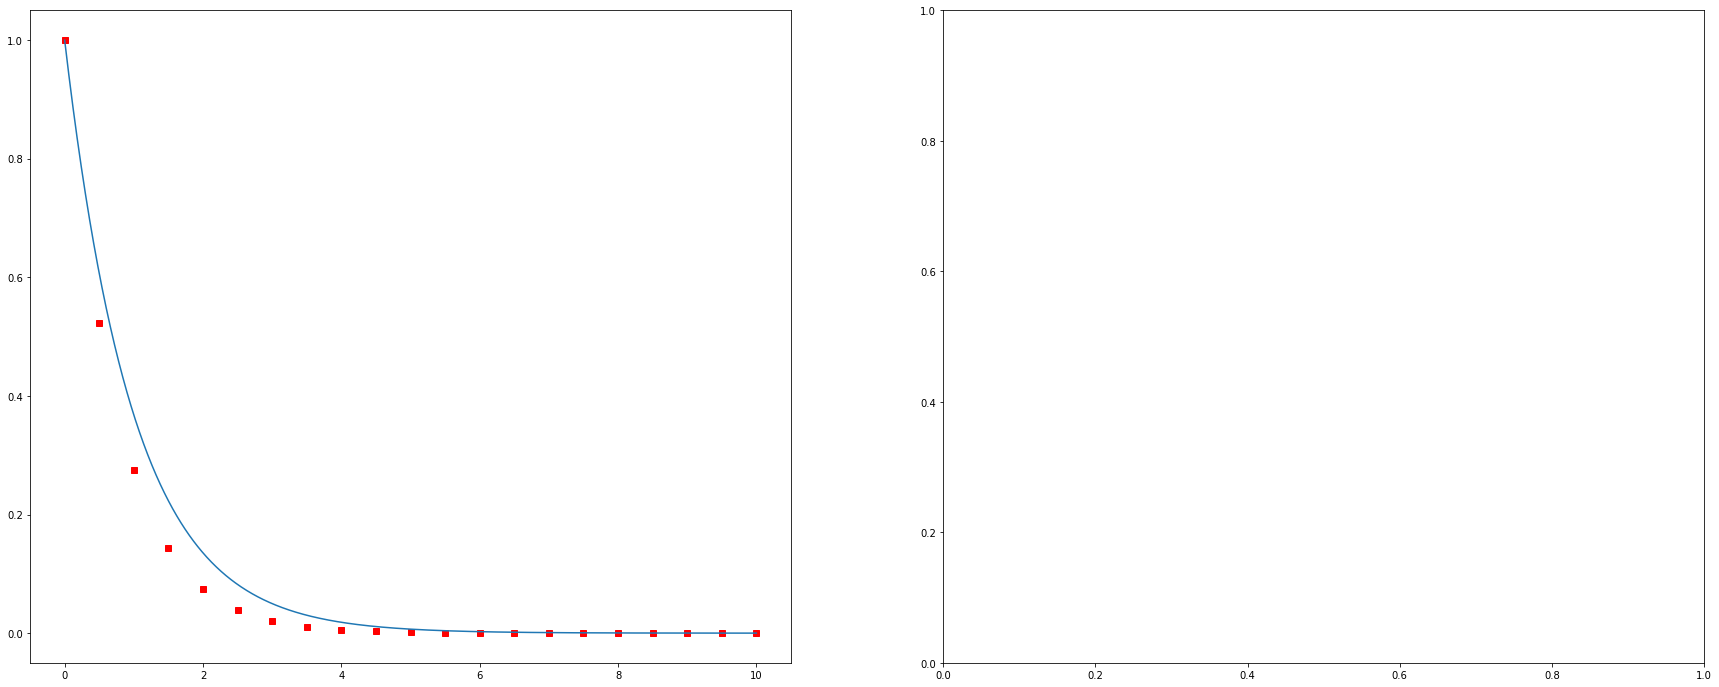

In [16]:
N = 20
Y1 = yav(N)
Y2 = neyav(N)
X = np.linspace(0, T, N + 1)
x0 = np.linspace(0, T, 1000)
plt.figure(figsize=(30, 12))
plt.subplot(1, 2, 1)
plt.plot(X, Y1, 'rs')
plt.plot(x0, np.exp(-x0))
plt.subplot(1, 2, 2)
plt.plot(X, Y2, 'rs')
plt.plot(x0, np.exp(-x0))

1.0809666746359994 ± 2.5346642044146636e-05
0.9695831394523541 ± 2.222193264505126e-06


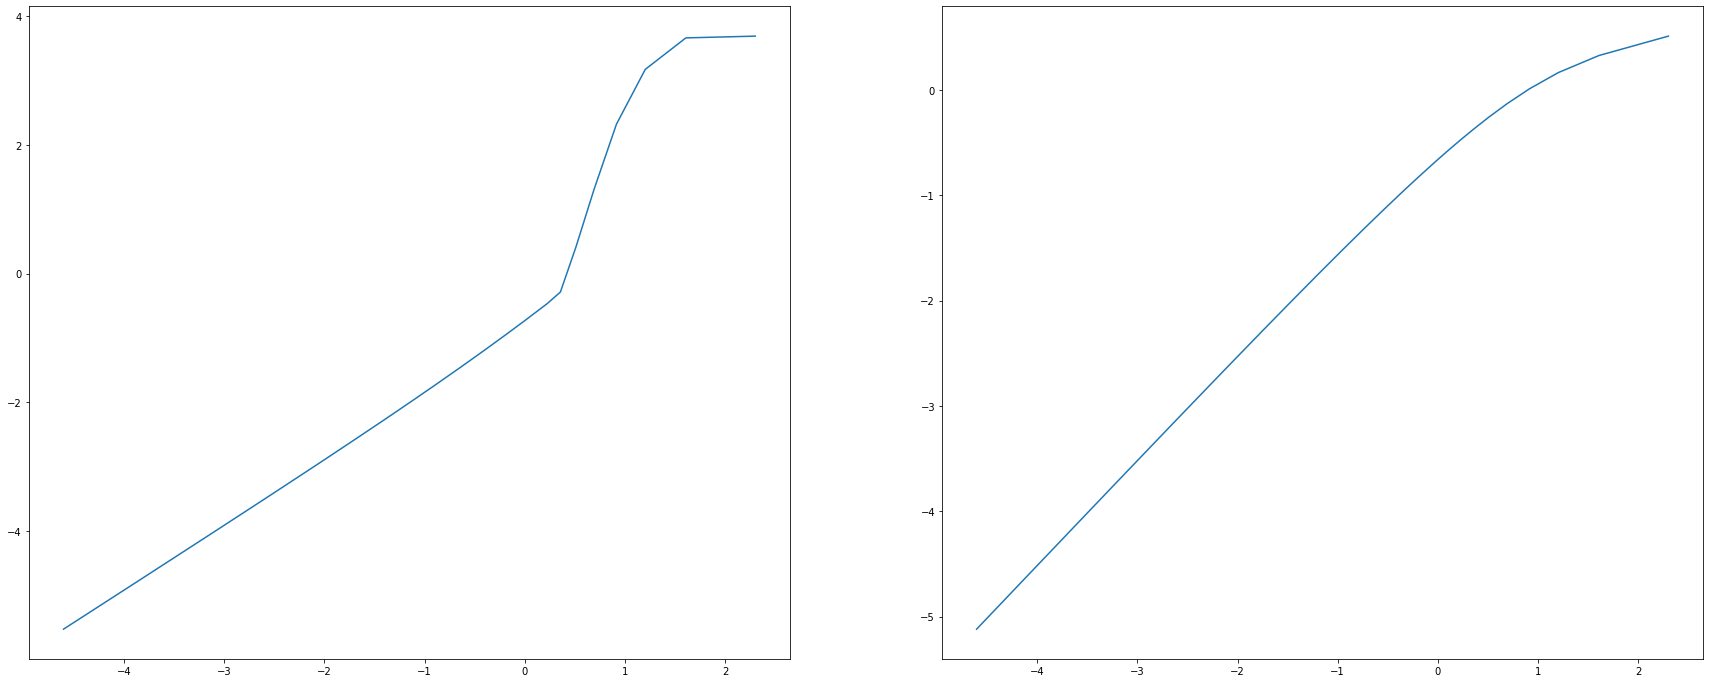

In [ ]:
E1 = err(yav, 1)
E2 = err(neyav, 1)
n = np.array(range(1000)) + 1
plt.figure(figsize=(30, 12))
plt.subplot(1, 2, 1)
k, error = np.polyfit(np.log(T / n), np.log(E1), deg=1, cov=True)
print(k[0], '±', error[0][0])
plt.plot(np.log(T / n), np.log(E1))
plt.subplot(1, 2, 2)
k, error = np.polyfit(np.log(T / n), np.log(E2), deg=1, cov=True)
print(k[0], '±', error[0][0])
plt.plot(np.log(T / n), np.log(E2))

2.452735950704767 ± 0.0002544567334433656


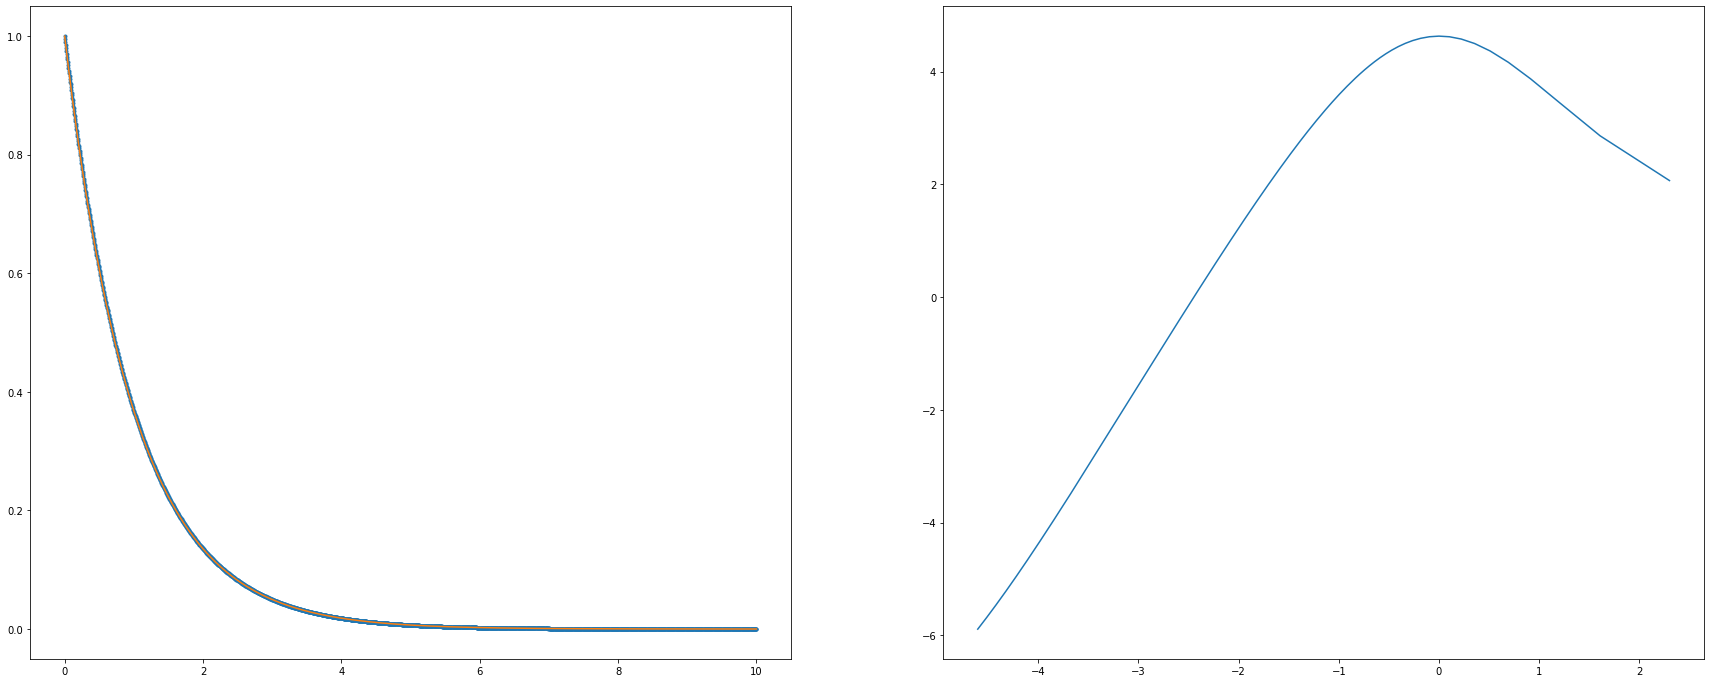

In [ ]:
N = 2000
Y = fit(N)
X = np.linspace(0, T, N + 2)
E = err(fit, 2)
n = np.array(range(1000)) + 1
plt.figure(figsize=(30, 12))
plt.subplot(1, 2, 1)
plt.plot(X, Y, '.')
plt.plot(X, np.exp(-X))
plt.subplot(1, 2, 2)
k, error = np.polyfit(np.log(T / n), np.log(E), deg=1, cov=True)
print(k[0], '±', error[0][0])
plt.plot(np.log(T / n), np.log(E))